# Business Problem

## Business Objective:
The objective is to predict delivery time based on sorting time. By understanding the relationship between these variables, the business can:
Optimize operational efficiency.
Reduce delivery delays.
Improve customer satisfaction by accurately estimating delivery schedules.
## Constraints:
Data Quality:
Limited data size (only 21 observations) might lead to less accurate predictions.
Linearity Assumption: 
Simple Linear Regression assumes a linear relationship between sorting time and delivery time, which might not hold true in all cases.
External Factors: 
Unrecorded variables like traffic, weather, or workforce efficiency might influence delivery time.
Scalability: 
The model may need to be retrained with larger datasets for broader applications.

# Data Description

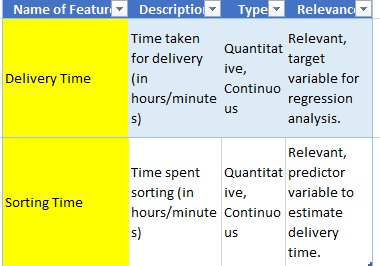



# Code Modularity 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\Data Set (Simple LinearRegression)\delivery_time.csv")

In [24]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Preprocessing
1) Data Cleaning, Feature Engineering, etc.
2) Outlier Treatment
3) Handling Outliers
4) Handling Missing_values
6) Handling Duplicates
7) Type Casting
8) Transformations

In [39]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [41]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [43]:
df.drop_duplicates()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Boxplot

<Axes: >

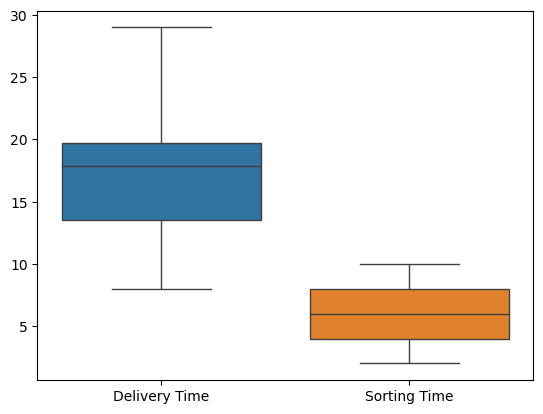

In [46]:
sns.boxplot(df) # Their is no outliers in the data set 

## Exploratoty Data Analysis(Descriptive Statistics)
1) First Moment Business Decision(Central Tendency)
2) Second Moment Business Decision(Dispersion)
3) Third Moment Business Decision(Skewness)
4) Fourth Moment Business Decision(Kurtosis)

In [48]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [49]:
df.median()

Delivery Time    17.83
Sorting Time      6.00
dtype: float64

# Second Moment Business Decision

In [54]:
df.var() # Variance

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [56]:
df.std() # Standard Deviation

Delivery Time    5.074901
Sorting Time     2.542028
dtype: float64

In [58]:
df.max()-df.min() # Range

Delivery Time    21.0
Sorting Time      8.0
dtype: float64

# Third Moment Business Decision

In [61]:
df.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [63]:
df.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

# Graphical Representation
1) Univariate Analysis(Boxplot,barplot,Histplot,violinplot)
2) Bivariate Analysis(Scatterplot)
3) Multivariate Analysis(Heatmap,interactionplot,pairplot)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


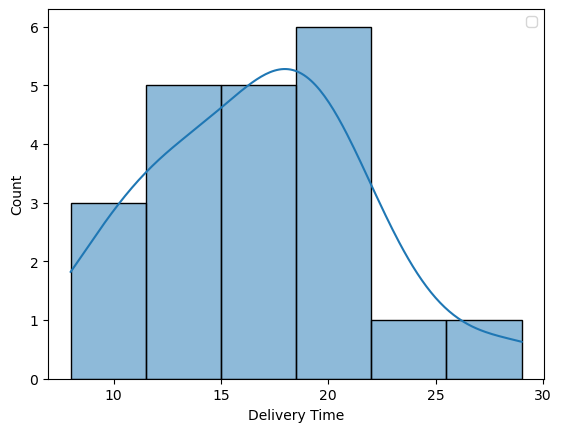

In [68]:
sns.histplot(df['Delivery Time'],kde=True)
plt.legend()
plt.show()

<Axes: xlabel='Sorting Time', ylabel='Count'>

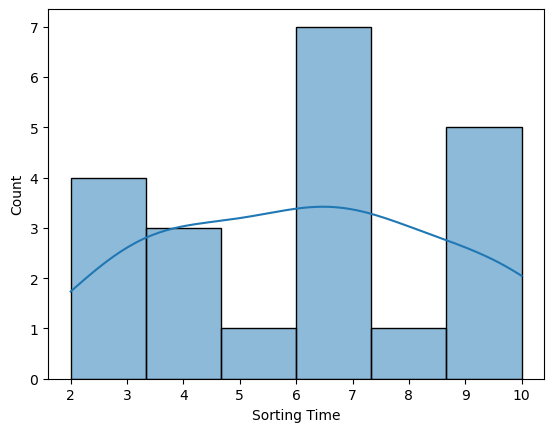

In [69]:
sns.histplot(df['Sorting Time'],kde=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


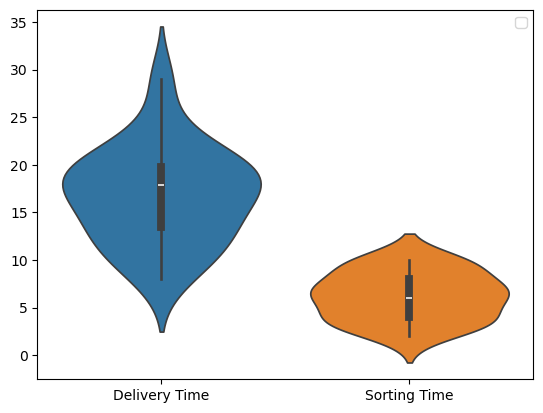

In [71]:
sns.violinplot(df)
plt.legend()
plt.show()

# Bivariate Analysis

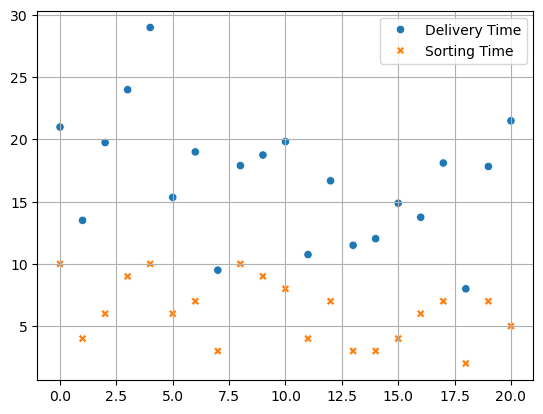

In [74]:
sns.scatterplot(df)
plt.legend()
plt.grid()
plt.show()

# Multivariate Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


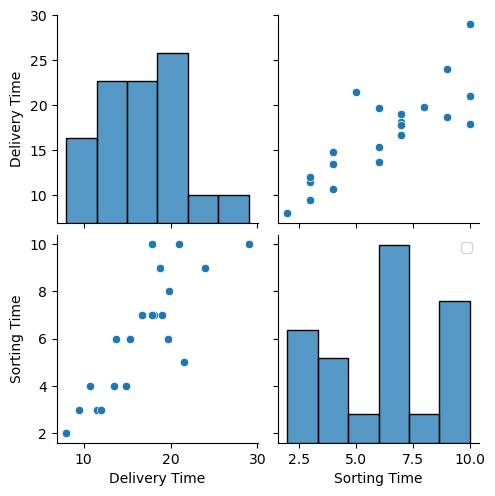

In [77]:
sns.pairplot(df)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


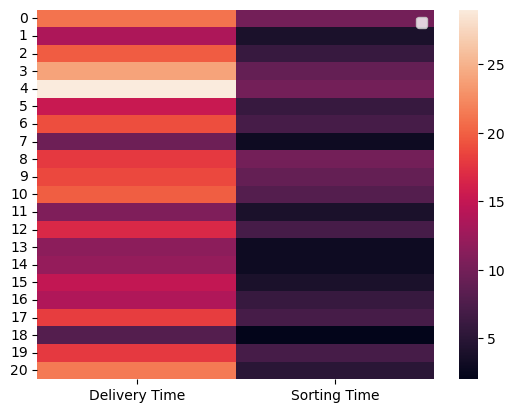

In [78]:
sns.heatmap(df)
plt.legend()
plt.show()

# Auto EDA

In [81]:
import sweetviz as sv
d=sv.analyze(df)
d.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [82]:
import dtale
d=dtale.show(df)
d.open_browser()

# Model Building

In [84]:
X=df[['Sorting Time']] # Independent Variable
y=df['Delivery Time'] # delivery time as the target variable

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
model=LinearRegression()

In [87]:
model

LinearRegression()

In [88]:
model.fit(X_train,y_train)

LinearRegression()

In [89]:
y_pred=model.predict(X_test)

In [91]:
y_pred

array([24.9247435 , 18.85200984, 12.77927618, 12.77927618, 24.9247435 ])

# Model Evaluation
1)The negative R² value suggests that the model's predictions are worse than simply using the mean of the target variable. 
This might be due to the limited size of the dataset or a weak linear relationship. 

In [93]:
r2_score(y_test,y_pred)

-1.0207599586367362

In [95]:
mse=mean_squared_error(y_test,y_pred)

In [97]:
mse

14.046738956635016

In [99]:
model.intercept_

4.682297962052008

In [101]:
model.coef_

array([2.02424455])